<a href="https://colab.research.google.com/github/JacksonLeb/tensorflow_learning/blob/main/03_Intro_To_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INtroductino to CNN and Computer Vision

In [ ]:
#Getting the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-06 23:52:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   147MB/s    in 0.7s    

2022-07-06 23:52:46 (147 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories nad {len(filenames)} images in '{dirpath}'")

There are 2 directories nad 0 images in 'pizza_steak'
There are 2 directories nad 0 images in 'pizza_steak/test'
There are 0 directories nad 250 images in 'pizza_steak/test/pizza'
There are 0 directories nad 250 images in 'pizza_steak/test/steak'
There are 2 directories nad 0 images in 'pizza_steak/train'
There are 0 directories nad 750 images in 'pizza_steak/train/pizza'
There are 0 directories nad 750 images in 'pizza_steak/train/steak'


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

#Visualizing our images


In [ ]:
#Getting classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
#view random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Set up the target directory
  target_folder = target_dir+target_class

  #get random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  #read in image and plot
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {image.shape}") #show us tensor
  return image



['1098844.jpg']
Image shape: (512, 512, 3)


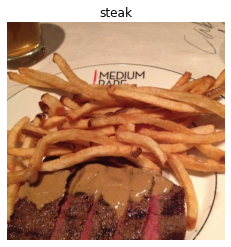

In [ ]:
#view ranodm image
img = view_random_image("pizza_steak/train/", "steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 80,  32,  18],
        [ 77,  29,  15],
        [ 75,  27,  13],
        ...,
        [189, 163, 130],
        [196, 170, 137],
        [192, 166, 133]],

       [[ 79,  31,  17],
        [ 76,  28,  14],
        [ 74,  26,  12],
        ...,
        [155, 129,  96],
        [177, 151, 118],
        [192, 166, 133]],

       [[ 78,  30,  16],
        [ 76,  28,  14],
        [ 74,  26,  12],
        ...,
        [135, 109,  76],
        [149, 123,  90],
        [170, 144, 111]],

       ...,

       [[ 52,  18,  17],
        [ 63,  29,  28],
        [ 53,  19,  17],
        ...,
        [253, 237, 203],
        [253, 237, 203],
        [253, 237, 203]],

       [[ 53,  22,  20],
        [ 63,  32,  30],
        [ 56,  22,  21],
        ...,
        [253, 237, 203],
        [253, 237, 203],
        [252, 236, 202]],

       [[ 41,  10,   8],
        [ 62,  31,  29],
        [ 53,  19,  18],
        ...,
        [253, 237, 20

In [ ]:
#view image shape
img.shape #widht, height, color channels

(512, 512, 3)

In [ ]:
img/255.0

array([[[0.31372549, 0.1254902 , 0.07058824],
        [0.30196078, 0.11372549, 0.05882353],
        [0.29411765, 0.10588235, 0.05098039],
        ...,
        [0.74117647, 0.63921569, 0.50980392],
        [0.76862745, 0.66666667, 0.5372549 ],
        [0.75294118, 0.65098039, 0.52156863]],

       [[0.30980392, 0.12156863, 0.06666667],
        [0.29803922, 0.10980392, 0.05490196],
        [0.29019608, 0.10196078, 0.04705882],
        ...,
        [0.60784314, 0.50588235, 0.37647059],
        [0.69411765, 0.59215686, 0.4627451 ],
        [0.75294118, 0.65098039, 0.52156863]],

       [[0.30588235, 0.11764706, 0.0627451 ],
        [0.29803922, 0.10980392, 0.05490196],
        [0.29019608, 0.10196078, 0.04705882],
        ...,
        [0.52941176, 0.42745098, 0.29803922],
        [0.58431373, 0.48235294, 0.35294118],
        [0.66666667, 0.56470588, 0.43529412]],

       ...,

       [[0.20392157, 0.07058824, 0.06666667],
        [0.24705882, 0.11372549, 0.10980392],
        [0.20784314, 0

#an end-to-end example
##Load images, prerpocess, build CNN, compile CN fit the CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(30)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set up paths
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=30)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=30)

#build a CNN
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(244,244,3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),  
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 106s 2s/step - loss: 0.5626 - accuracy: 0.7233 - val_loss: 0.4343 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 105s 2s/step - loss: 0.4297 - accuracy: 0.8113 - val_loss: 0.3518 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 104s 2s/step - loss: 0.3756 - accuracy: 0.8500 - val_loss: 0.3849 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 104s 2s/step - loss: 0.3051 - accuracy: 0.8700 - val_loss: 0.4283 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 104s 2s/step - loss: 0.2311 - accuracy: 0.9107 - val_loss: 0.4272 - val_accuracy: 0.8140
